# - Evolution of Global Streaming Content: Netflix Data Analysis (2008–2021) -
## Objective: To analyze growth trends, content patterns, and strategic shifts in Netflix's catalog.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10,5)

### Load dataset

In [6]:
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Data Overview

In [7]:
data.shape
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Basic Cleaning

In [10]:
# Remove duplicates
data = data.drop_duplicates()


In [11]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [12]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

### Top 10 countries

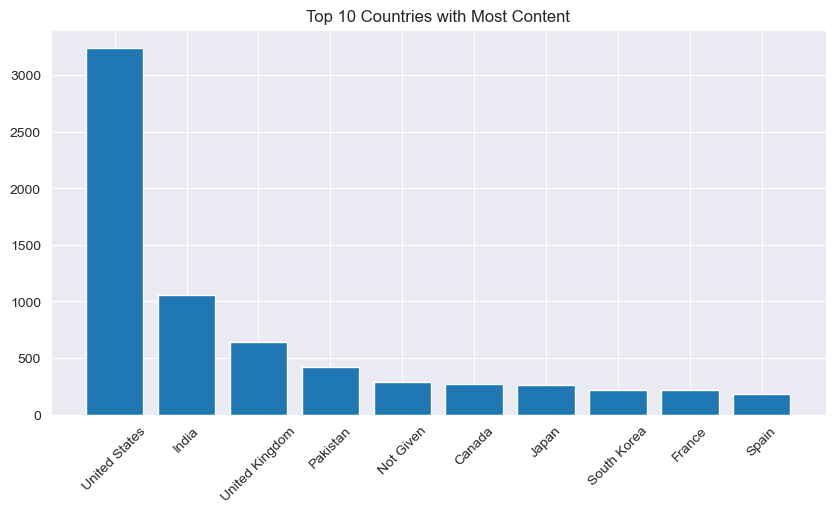

In [15]:
top_countries = data['country'].value_counts().head(10)

plt.bar(top_countries.index, top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Content")
plt.show()

### 1.Maximum growth year

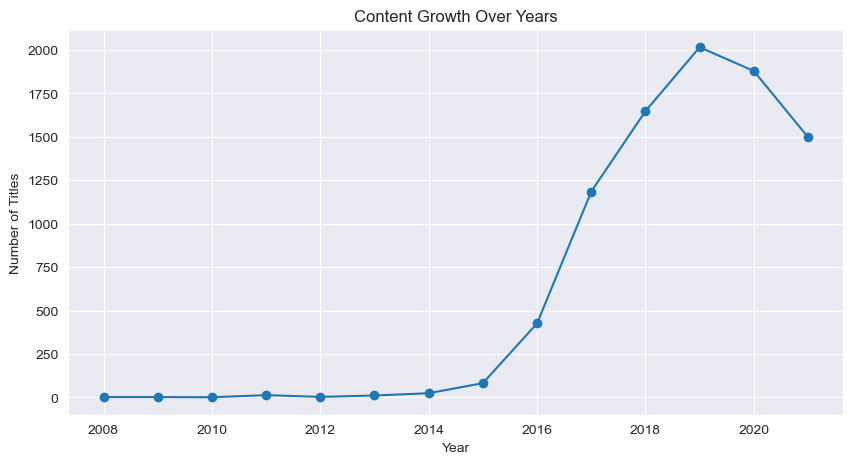

np.int32(2019)

In [27]:
yearly = data['year_added'].value_counts().sort_index()

plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
yearly.idxmax()

### Insight : The highest content addition occurred in the year 2019

### 2.Movies VS TV Shows growth pattern

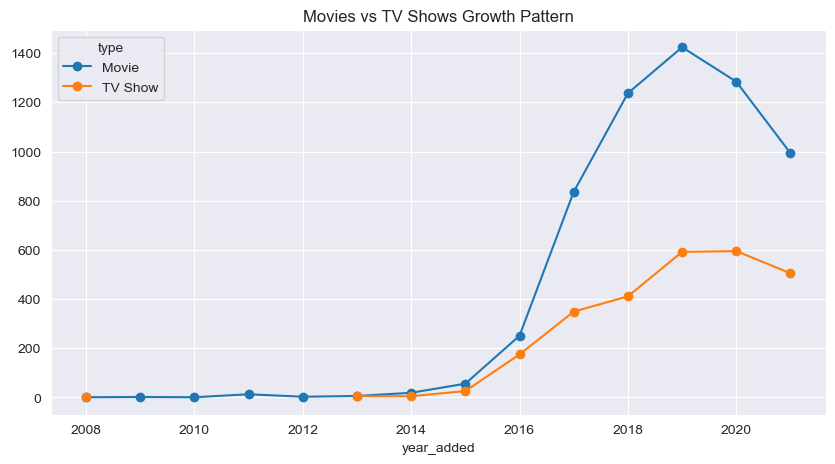

In [28]:
type_year = data.groupby(['year_added','type']).size().unstack()

type_year.plot(marker='o')
plt.title("Movies vs TV Shows Growth Pattern")
plt.show()

### Insight : Movies dominated initially , but TV shows increased significantly after 2018

### 3.Content trend in India

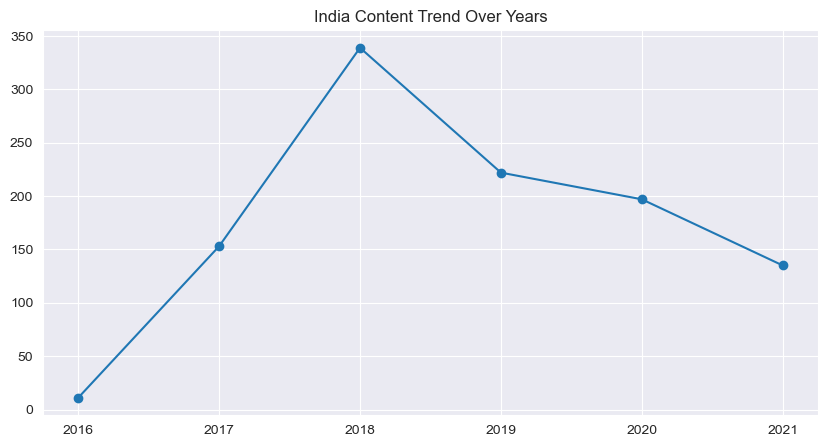

In [24]:
india = data[data['country']=="India"]

india_year = india['year_added'].value_counts().sort_index()

plt.plot(india_year.index, india_year.values, marker='o')
plt.title("India Content Trend Over Years")
plt.show()

### Insight : Indian content saw major growth after 2016

### 4.Content ratings over the years

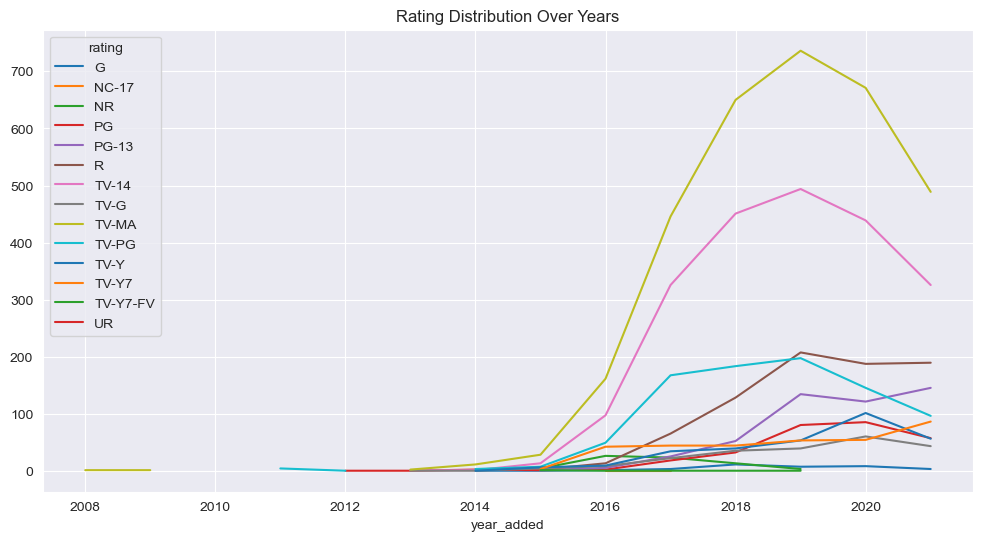

In [25]:
rating_year = data.groupby(['year_added','rating']).size().unstack()

rating_year.plot(figsize=(12,6))
plt.title("Rating Distribution Over Years")
plt.show()

### Insight : Mature content (TV-MA) increased significantly after 2015 .

### 5.Duration pattern analysis

### Split duration

In [29]:
data[['duration_value','duration_type']] = data['duration'].str.split(' ', expand=True)

data.loc[data['type']=="Movie", 'duration_value'] = \
data.loc[data['type']=="Movie", 'duration_value'].astype(int)

movies = data[data['type']=="Movie"]

### Histogram

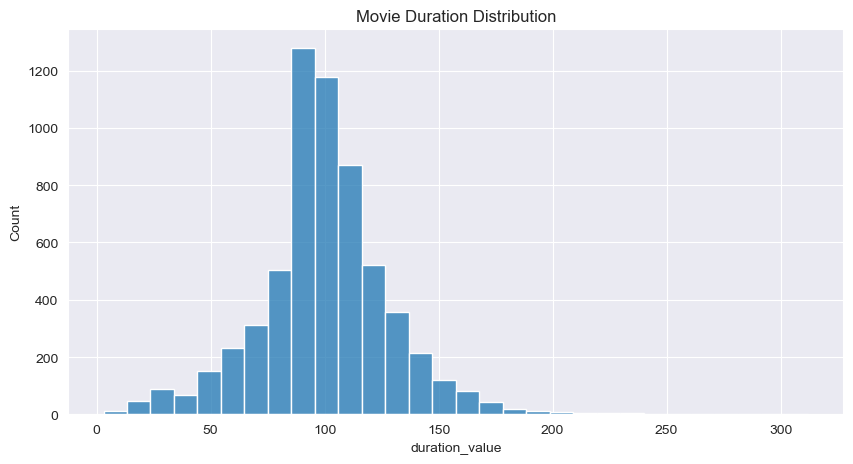

In [30]:
sns.histplot(movies['duration_value'], bins=30)
plt.title("Movie Duration Distribution")
plt.show()

### Average Duration over years

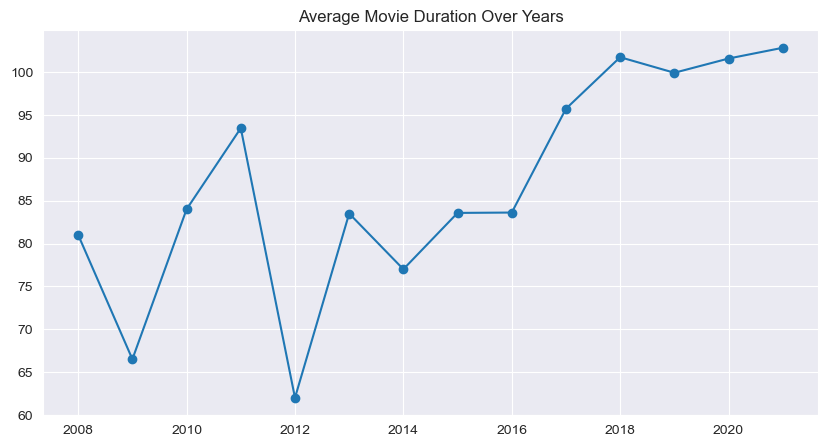

In [26]:
movie_duration_year = movies.groupby('year_added')['duration_value'].mean()

plt.plot(movie_duration_year.index, movie_duration_year.values, marker='o')
plt.title("Average Movie Duration Over Years")
plt.show()

### Insight : Average movie duration appears to increase over time .

### 6.Content age analysis

In [32]:
# Created content age column
data['content_age'] = data['year_added'] - data['release_year']

# Checked first few rows
data[['title','release_year','year_added','content_age']].head()

,title,release_year,year_added,content_age
0,Dick Johnson Is Dead,2020,2021,1
1,Ganglands,2021,2021,0
2,Midnight Mass,2021,2021,0
3,Confessions of an Invisible Girl,2021,2021,0
4,Sankofa,1993,2021,28


In [20]:
data['content_age'].describe()

count    8790.000000
mean        4.690444
std         8.790029
min        -3.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
Name: content_age, dtype: float64

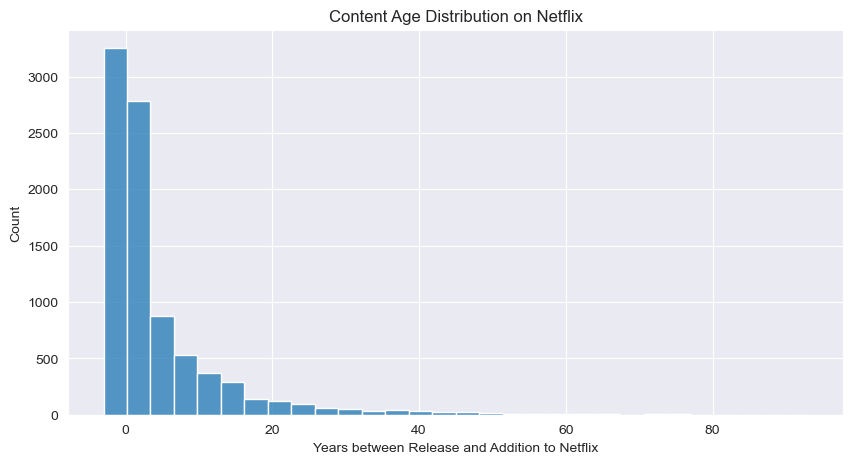

In [21]:
sns.histplot(data['content_age'], bins=30)
plt.title("Content Age Distribution on Netflix")
plt.xlabel("Years between Release and Addition to Netflix")
plt.show()

### Insight : The highest number of titles have a content age of 0 years, which means they were added to Netflix in the same year they were released. This shows that Netflix quickly acquires and uploads newly released content. Very few titles are added after a long gap, indicating that the platform focuses more on recent releases rather than very old movies or shows.

## Final Conclusion :
## 1. Netflix experienced maximum growth in 2019.
## 2. TV Shows gained momentum after 2015.
## 3. Indian content expanded rapidly post 2016.
## 4. Mature ratings like TV-MA became more dominant over time.
## 5. Netflix primarily focuses on recent releases.